# 01 Data Acquisition

##Install & Import Library

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Load Dataset

In [27]:
#Dowload dataset
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv

--2023-05-04 06:43:48--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65494 (64K) [text/plain]
Saving to: ‘dataset_komentar_instagram_cyberbullying.csv.1’

dataset_komentar_in 100%[===================>]  63.96K  --.-KB/s    in 0.002s  

2023-05-04 06:43:48 (37.0 MB/s) - ‘dataset_komentar_instagram_cyberbullying.csv.1’ saved [65494/65494]



In [28]:
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [29]:
data = data.rename(columns = {'Instagram Comment Text': 'Comment Instagram'})
data.rename(columns = {'Instagram Comment Text': 'Comment Instagram'}, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 400 non-null    int64 
 1   Sentiment          400 non-null    object
 2   Comment Instagram  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [31]:
data['Sentiment'].value_counts()

negative    200
positive    200
Name: Sentiment, dtype: int64

# 02 Text Preprocessing

#Case Folding

In [32]:
import re

# Buat fungsi untuk langkah case folding
def CommentIg_casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+!', '', text)          # Menghapus angka
  text = re.sub(r'[^\w\s\""≤<>Ö:v_-]+','', text)    # Menghapus karakter tanda baca
  text = text.strip()
  return text



In [33]:
raw_sample = data['Comment Instagram'].iloc[200]
case_folding = CommentIg_casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  yang sabar yaa.. insya Allah menjadi pembuka pintu syurga dan penghalang api neraka bagi kedua orang tuanya


Case folding	:  yang sabar yaa insya allah menjadi pembuka pintu syurga dan penghalang api neraka bagi kedua orang tuanya


#Filtering (Stopword Removal Comment Intagram)

In [34]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_Comment_Instagram = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
len(stopwords_Comment_Instagram)

758

In [36]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_Comment_Instagram

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [37]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['username', 'hadeww', 'lg', 'ATT', 'bgt', 'skrg',
                 'd', 'elah', 'krn', 'rt', 'dr', 'pd','ber', 'Ckck',
                 'Mna', 'mna', 'eneg', 'yg', 'pny', 'jd', 'aj', 'dg',
                 'sgj','Mrsk', 'pny', 'g', 'mua', 'ttp', 'ny', 'tp',
                 'gt', 'jg', 'ni', 'haltis', 'M', 'lbh', 'wes', 'org',
                 'la', 'curh', 'am', 'gw', 'dr', 'az', 'd', 'k', 'KD',
                 'or', 'n', 'an', 'bc', 'nmx', 'KL', 'sm', 'ky', 'G',
                 'la', 'bs', '...',]                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_Comment_Instagram + more_stopword

def CommentIg_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [38]:
raw_sample = data['Comment Instagram'].iloc[10]
case_folding = CommentIg_casefolding(raw_sample)
stopword_removal = CommentIg_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('\n\nCase folding\t\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data		:  Syarat sah nikah menurut agama islam hanya 5 yaitu : adanya CPP, adanya CPW, saksi, wali nikah dan mas kawin/mahar. Perkara makeup gak manglingi bukan syarat sah pernikahan. Sekalipun gak makeup tapi syarat yg 5 tersebut terpenuhi maka pernikahannya SAH yak emak emak julids


Case folding		:  syarat sah nikah menurut agama islam hanya 5 yaitu : adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg 5 tersebut terpenuhi maka pernikahannya sah yak emak emak julids


Stopword removal	:  syarat sah nikah agama islam 5 : cpp cpw saksi wali nikah mas kawinmahar perkara makeup gak manglingi syarat sah pernikahan gak makeup syarat 5 terpenuhi pernikahannya sah yak emak emak julids


##Stemming

In [39]:
# Install library Sastrawi
!pip -q install sastrawi

In [40]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [41]:
raw_sample = data['Comment Instagram'].iloc[200]
case_folding = CommentIg_casefolding(raw_sample)
stopword_removal = CommentIg_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('\n\nCase folding\t\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t\t: ', text_stemming)

Raw data		:  yang sabar yaa.. insya Allah menjadi pembuka pintu syurga dan penghalang api neraka bagi kedua orang tuanya


Case folding		:  yang sabar yaa insya allah menjadi pembuka pintu syurga dan penghalang api neraka bagi kedua orang tuanya


Stopword removal	:  sabar yaa insya allah pembuka pintu syurga penghalang api neraka orang tuanya


Stemming		:  sabar yaa insya allah buka pintu syurga halang api neraka orang tua


##Text Preprocessing

In [42]:
def text_preprocessing_process(text):
    text = CommentIg_casefolding(text)
    text = CommentIg_stop_words(text)
    #text = stemming(text)
    return text


In [43]:
!pip -q install swifter

In [44]:
import swifter
%time


data['clean_CommentIg'] = data['Comment Instagram'].swifter.apply(text_preprocessing_process)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


Pandas Apply:   0%|          | 0/400 [00:00<?, ?it/s]

In [45]:
data

,Id,Sentiment,Comment Instagram,clean_CommentIg
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,<username> tolol gak hubungan nya keguguran dg...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo dibela2in balikanhadewwntar...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket duhhh labil sih mba...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kesel att nya gausah anaknya kasian pe...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri disela apapun profesimu kau...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya halal u tuk menafkahi kelu...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran gak kerja trus put...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,<username> aslinya cantik ayu loh mbak bertemu...


In [46]:
data.Sentiment = [ 1 if each == 'positive' else -1 for each in data.Sentiment]
data

,Id,Sentiment,Comment Instagram,clean_CommentIg
0,1,-1,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,<username> tolol gak hubungan nya keguguran dg...
1,2,-1,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo dibela2in balikanhadewwntar...
2,3,-1,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket duhhh labil sih mba...
3,4,-1,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kesel att nya gausah anaknya kasian pe...
4,5,-1,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,1,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri disela apapun profesimu kau...
396,397,1,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya halal u tuk menafkahi kelu...
397,398,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran gak kerja trus put...
398,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,<username> aslinya cantik ayu loh mbak bertemu...


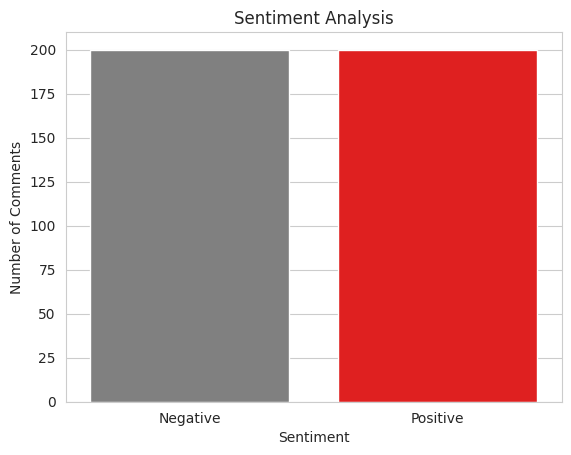

In [47]:
sns.countplot(data=data, x='Sentiment', palette=['grey', 'red'])
sns.set_style('whitegrid')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Analysis')

# tambahkan label pada bar chart
plt.xticks([0, 1], ['Negative', 'Positive'])

plt.show()

In [48]:
print('Jumlah Sentiment Negative:', round(data['Sentiment'].value_counts()[-1]), 'Percentage:', round(data['Sentiment'].value_counts()[-1] / len(data) * 100, 2), '%')
print('Jumlah Sentiment Negative:', round(data['Sentiment'].value_counts()[1]), 'Percentage:', round(data['Sentiment'].value_counts()[1] / len(data) * 100, 2), '%')


Jumlah Sentiment Negative: 200 Percentage: 50.0 %
Jumlah Sentiment Negative: 200 Percentage: 50.0 %


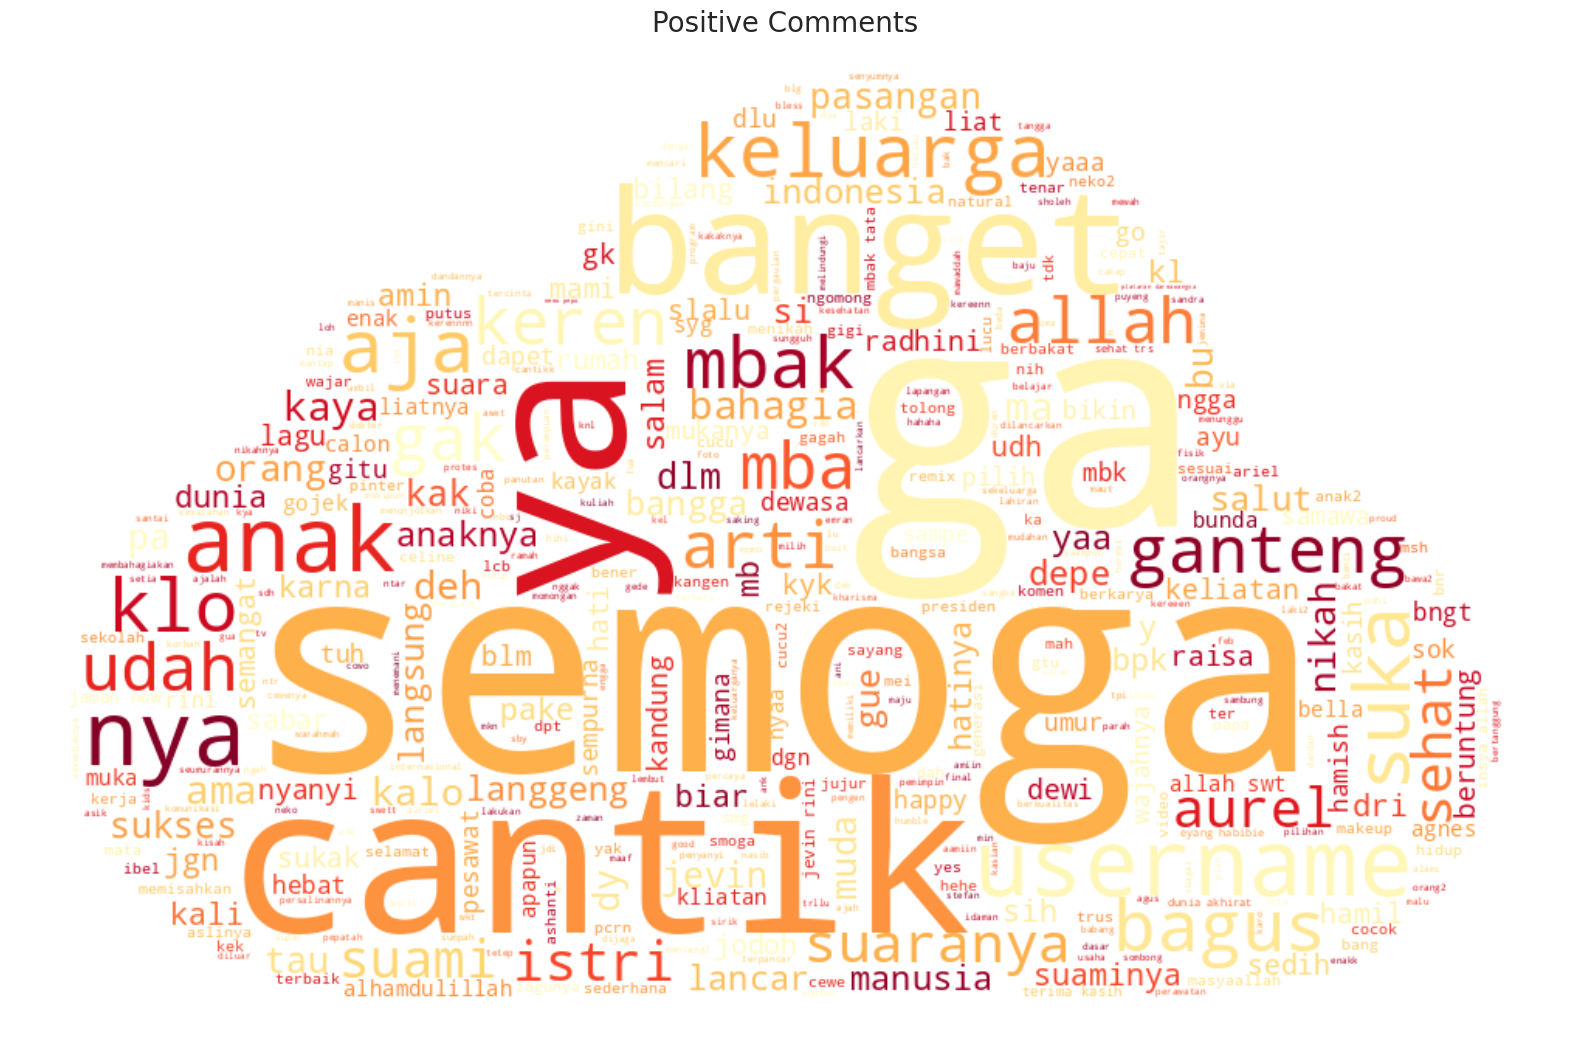

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

positive_data = data[data.Sentiment == 1]['clean_CommentIg']
positive_data_string = ' '.join(positive_data)

# load mask image
mask = np.array(Image.open("download.png"))

# setup colormap
cmap = 'YlOrRd'

# generate WordCloud
wc = WordCloud(max_words=2500, width=1200, height=600, background_color="white", mask=mask, colormap=cmap)
wc.generate(positive_data_string)

plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Comments', fontsize=20)
plt.show()


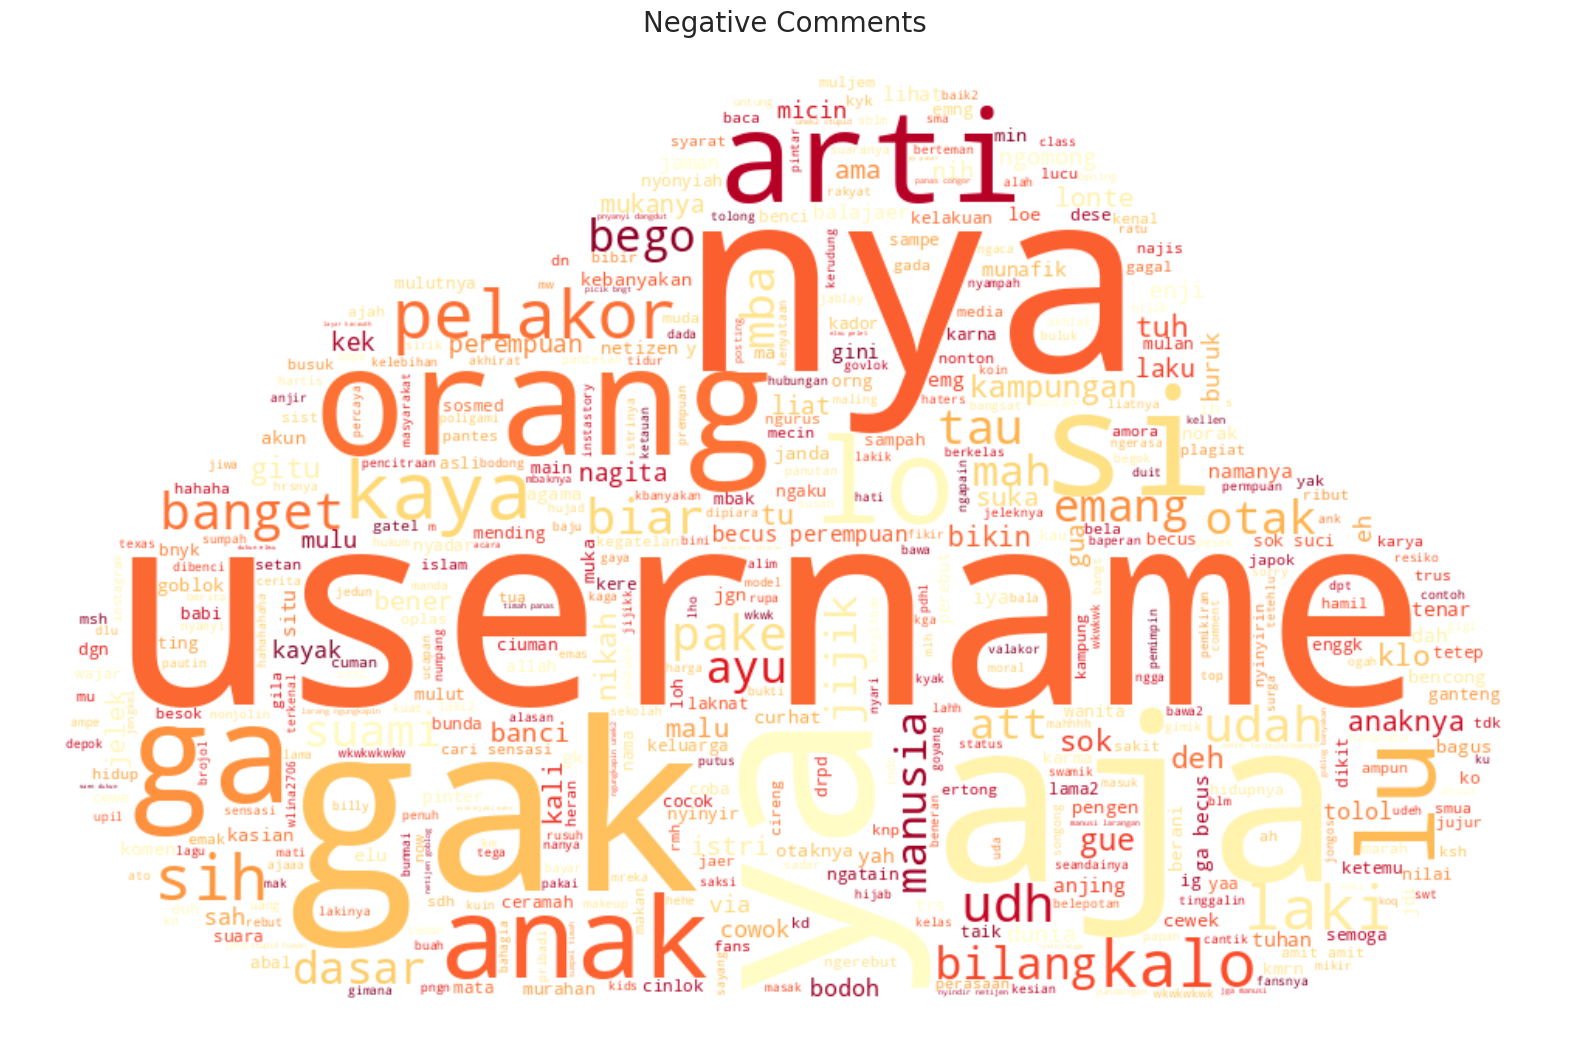

In [49]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

negative_data = data[data.Sentiment == -1]['clean_CommentIg']
negative_data_string = ' '.join(negative_data)

# load mask image
mask = np.array(Image.open("download.png"))

# setup colormap
cmap = 'YlOrRd'

# generate WordCloud
wc = WordCloud(max_words=2500, width=1200, height=600, background_color="white", mask=mask, colormap=cmap)
wc.generate(negative_data_string)

plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Comments', fontsize=20)
plt.show()

## Feature Extraction 
Vectorizer dengan metode TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(data['clean_CommentIg'])

TfidfVectorizer(ngram_range=(1, 2))

In [51]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

8850


In [52]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['10' '10 memimpinsemoga' '15' ... 'zholimi salahinnya' 'zzzzz'
 'zzzzz emng']


In [53]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(data['clean_CommentIg']).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,10,10 memimpinsemoga,15,15 final,15 jevin,16,16 jevin,17,17 jevin,1996,...,yutub,yutub ya,zaman,zaman niw,zaman now,zaman pipi,zholimi,zholimi salahinnya,zzzzz,zzzzz emng
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection (Chi Square)

In [55]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(data['Sentiment'])

In [56]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 8850
Reduced feature number: 1000


In [57]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.212347
1,0.212347
2,0.136371
3,0.045457
4,0.090914
...,...
8845,0.129798
8846,0.148487
8847,0.148487
8848,0.207352


In [58]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.212347,10
1,0.212347,10 memimpinsemoga
2,0.136371,15
3,0.045457,15 final
4,0.090914,15 jevin
...,...,...
8845,0.129798,zaman pipi
8846,0.148487,zholimi
8847,0.148487,zholimi salahinnya
8848,0.207352,zzzzz


In [59]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
1610,4.139641e+00,cantik
7328,3.208895e+00,semoga
4646,2.634192e+00,lo
4106,2.583332e+00,keren
6450,2.501224e+00,pelakor
...,...,...
7639,4.841257e-06,sma
3198,7.012796e-07,hitam
6900,7.012796e-07,putih
8775,6.011627e-07,yaelah


In [60]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [61]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aamiin',
 'abal',
 'abal abal',
 'abal enggk',
 'agus',
 'aja',
 'aja belepotan',
 'aja biar',
 'aja gak',
 'aja hahahahahaha',
 'aja mbak',
 'aja pake',
 'aja ya',
 'ajalah',
 'akhlak',
 'akun',
 'akuuu',
 'alami',
 'alhamdulillah',
 'alhamdulillah ganteng',
 'allah',
 'allah kasih',
 'allah suaranya',
 'amiin',
 'amin',
 'amit',
 'amit amit',
 'amora',
 'ampun lakikny',
 'anak babi',
 'anak2',
 'ancur',
 'ancur banget',
 'angguunn',
 'ani',
 'ani sekeluarga',
 'anjing',
 'anjir',
 'anjir mukanya',
 'anjir tontonan',
 'anyiennnnggg',
 'anyiennnnggg suaranya',
 'apain',
 'apain ya',
 'apapun',
 'ariel',
 'artis',
 'artis abal',
 'artis kampung',
 'artis kampungan',
 'artis papan',
 'ashanti',
 'ashanti username',
 'asik',
 'asik bgts',
 'asik dengernyaa',
 'asli',
 'aslii',
 'aslii angguunn',
 'aslinya',
 'att',
 'aurel',
 'aurel azriel',
 'aurel dpt',
 'awet',
 'ayu',
 'ayu janda',
 'azriel',
 'babang emran',
 'babi',
 'babi pesek',
 'baca',
 'badaaiik',
 'badaaiik ughllaaaallaa',
 

In [62]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v  

In [63]:
kbest_feature

{'username': 8458,
 'tolol': 8205,
 'gak': 2665,
 'nya': 6010,
 'pake': 6316,
 'hijab': 3189,
 'lo': 4646,
 'bilang': 1308,
 'otak': 6270,
 'sih': 7533,
 'tuh': 8270,
 'mbak': 5044,
 'sensasi': 7383,
 'cari sensasi': 1668,
 'att': 588,
 'orang': 6196,
 'bener': 1072,
 'perasaan': 6575,
 'namanya': 5637,
 'permpuan': 6639,
 'artis': 503,
 'laki': 4447,
 'ngurus': 5870,
 'aja': 102,
 'becus': 967,
 'mending': 5163,
 'aja gak': 121,
 'nya aja': 6011,
 'balajaer': 778,
 'ig': 3260,
 'asik': 558,
 'lama2': 4497,
 'lagu': 4424,
 'laknat': 4479,
 'banget': 819,
 'kelakuan': 3973,
 'indonesia': 3296,
 'bodoh': 1421,
 'buruk': 1559,
 'murahan': 5573,
 'berkelas': 1148,
 'ayu': 642,
 'janda': 3462,
 'bego': 1000,
 'kpn': 4341,
 'laginya': 4423,
 'ayu janda': 649,
 'janda bego': 3463,
 'bego suami': 1011,
 'suami kpn': 7778,
 'kpn nikah': 4342,
 'nikah laginya': 5903,
 'anyiennnnggg': 453,
 'suaranya': 7810,
 'ancur': 399,
 'tukang': 8297,
 'gorengan': 2939,
 'anyiennnnggg suaranya': 454,
 'suara

In [64]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aamiin,abal,abal abal,abal enggk,agus,aja,aja belepotan,aja biar,aja gak,aja hahahahahaha,...,yaampun,yaampun cantiikk,yah,yak suara,yatuhan,yatuhan suaranyaaaaaaa,yes,yesssssss,yesssssss bagus,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Modelling


In [65]:
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump 


X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, data['Sentiment'], test_size=0.2, random_state=42)


In [66]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

#Naive Bayes

In [67]:
# Training the model Naive Bayes
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model.joblib')

['model.joblib']

In [68]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1])

In [69]:
cm3 = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm3)

Confusion matrix:
 [[40  4]
 [ 2 34]]


##ModelEvaluasi


In [70]:
#Hasil Naive Bayes
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

          -1       0.95      0.91      0.93        44
           1       0.89      0.94      0.92        36

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [71]:
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.925  0.9375 0.95   0.8625 0.9375 0.925  0.95   0.85   0.95   0.95  ] 

Rata-rata akurasi pada cross validation: 0.9237499999999998


#Simple Deployment

In [73]:
# save the model to disk
dump(model, filename="model_sentiment_analisis.model")

['model_sentiment_analisis.model']